# BigMart Sales Predictive Analysis

## Problem Statement
***The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store***.

## Hypothesis Generation
***By looking at the data we can make hypothesis which can be right or wrong.***

    1)The selling price of a product at each store is differnet from the other.
    
    2)Every item is divided into some categories based on amount of fat present in the itme.
    
    3)There is a correlation between the price of items at Big Mart and their sales volume, such 
    that as the price of an item increases, its sales volume will decrease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings("ignore")

In [2]:
mart_df = pd.read_csv('Train.csv')

In [3]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Structure and Content 

In [4]:
mart_df.shape

(8523, 12)

Our dataset contains 8523 rows and 12 columns and we have features like id of product its price and Outlets also have thier id and type of the outlet etc..

In [5]:
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In the above table we have mean, std, count, minimum, maximum values of the numerical columns.

In [6]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In the above cell we have discovered that what data types are present in our data, by using info() we have two types of data one comes under float64 which are numerical values and other one is object which can be theoritical or categorical columns.

## Exploratory Data Analysis 

Separating the categorical and numerical columns

In [7]:
num_cols = mart_df.select_dtypes(exclude="object").columns.tolist()
print(num_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [8]:
cat_cols = mart_df.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### Data Cleaning & Handling inconsistent data

In [9]:
# Checking for null values
mart_df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

We will fill these null values by using Imputing technique

In [10]:
# For numerical column
replacing_values = mart_df["Item_Weight"].mean()
mart_df["Item_Weight"].replace(np.nan, replacing_values, inplace=True)

In [11]:
# For categorical column
imputer = SimpleImputer(strategy='most_frequent')

mart_df['Outlet_Size'] = imputer.fit_transform(mart_df[['Outlet_Size']])

In our dataset in Item Visibility column we have so many '0' which can effect our models accuracy so we replace them with mean values of the column.

In [12]:
sum(mart_df['Item_Visibility']==0)
mart_df['Item_Visibility'] = mart_df['Item_Visibility'].replace(0, mart_df['Item_Visibility'].mean())

There is inconssistancy in Item_Fat_Content column so we have to resolve these inconsistancies like it gave Low Fat to some rows and LF to other rows but in actually they both are same.

In [13]:
mart_df['Item_Fat_Content'] = mart_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
mart_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Handling Duplicate values

In [15]:
# Checking for duplicate values
duplicate = mart_df.duplicated()
print(duplicate.sum())

0


Since we don't have any duplicate record in out dataset so we will proceed further.

## Univariate Analysis

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

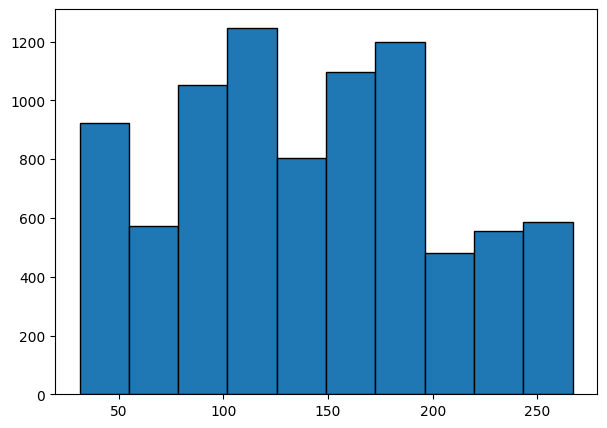

In [16]:
plt.figure(figsize=(7,5))
plt.hist(mart_df["Item_MRP"], edgecolor="black")

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

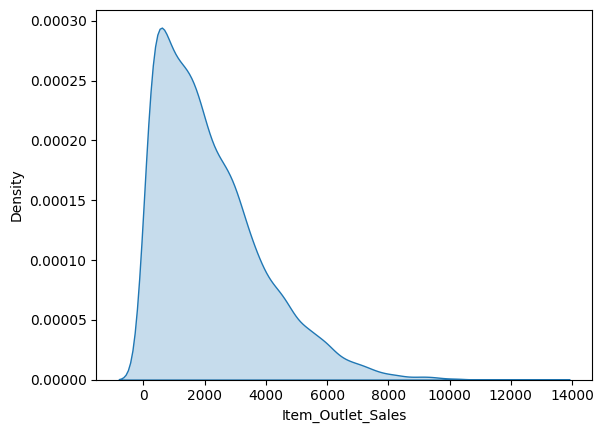

In [17]:
sns.kdeplot(mart_df["Item_Outlet_Sales"], fill=True)

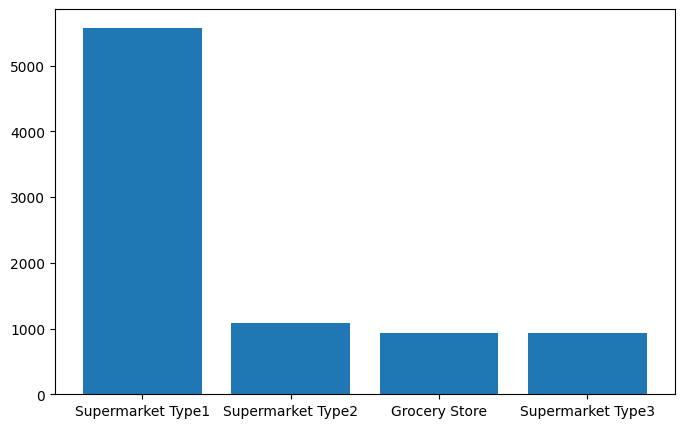

In [18]:
counts = mart_df["Outlet_Type"].value_counts()
values = mart_df["Outlet_Type"].unique()
plt.figure(figsize=(8,5))
plt.bar(values, counts)
plt.show()

## Bivariate Analysis

In this section we will find the dependent and independent variables in the dataset & plot them.

In [19]:
mart_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


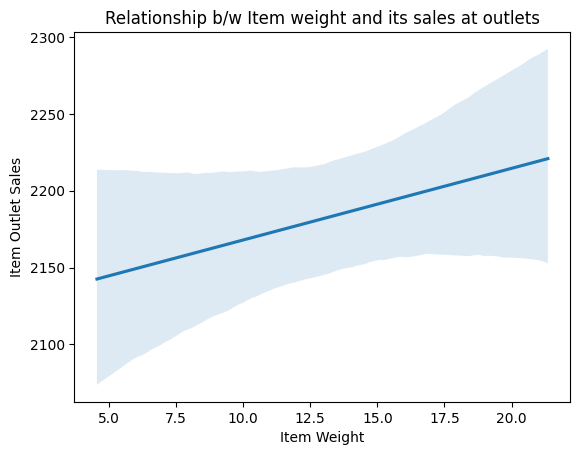

In [20]:
# Create the figure
sns.regplot(x=mart_df["Item_Weight"], y=mart_df["Item_Outlet_Sales"], scatter=False)

# Add labels and title
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item weight and its sales at outlets')

# Show the plot
plt.show()

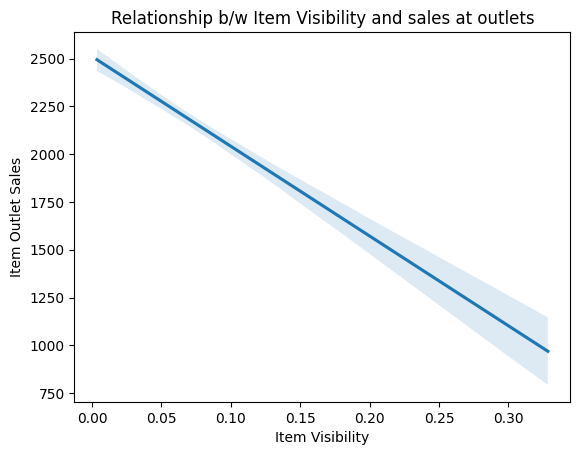

In [21]:
# Create the figure
sns.regplot(x=mart_df["Item_Visibility"], y=mart_df["Item_Outlet_Sales"], scatter=False)

# Add labels and title
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item Visibility and sales at outlets')

# Show the plot
plt.show()

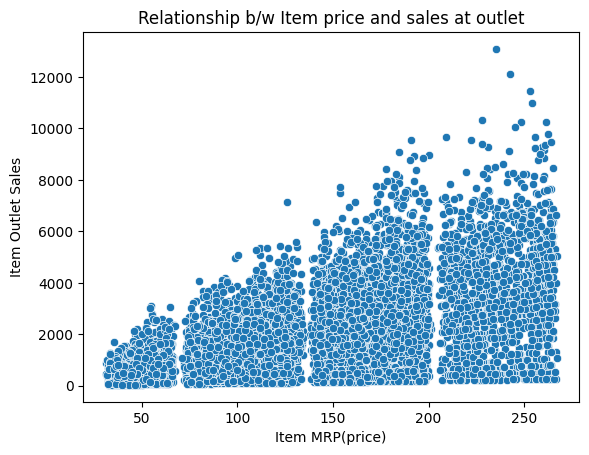

In [22]:
# Create the figure
sns.scatterplot(x=mart_df["Item_MRP"], y=mart_df["Item_Outlet_Sales"])

# Add labels and title
plt.xlabel('Item MRP(price)')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item price and sales at outlet')

# Show the plot
plt.show()

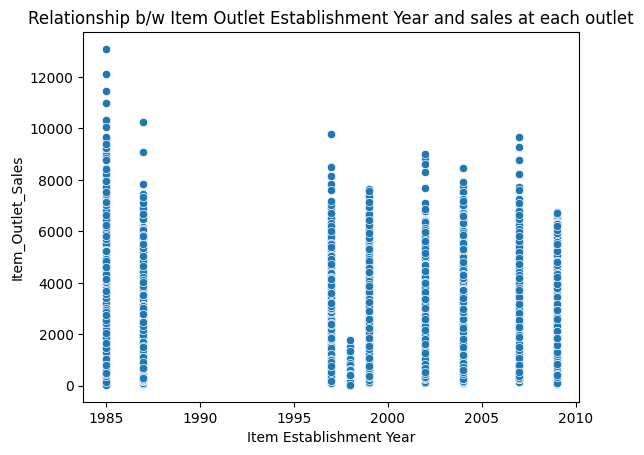

In [23]:
# Create the figure
sns.scatterplot(x=mart_df["Outlet_Establishment_Year"], y=mart_df["Item_Outlet_Sales"])

# Add labels and title
plt.xlabel('Item Establishment Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Outlet Establishment Year and sales at each outlet')

# Show the plot
plt.show()

<AxesSubplot: >

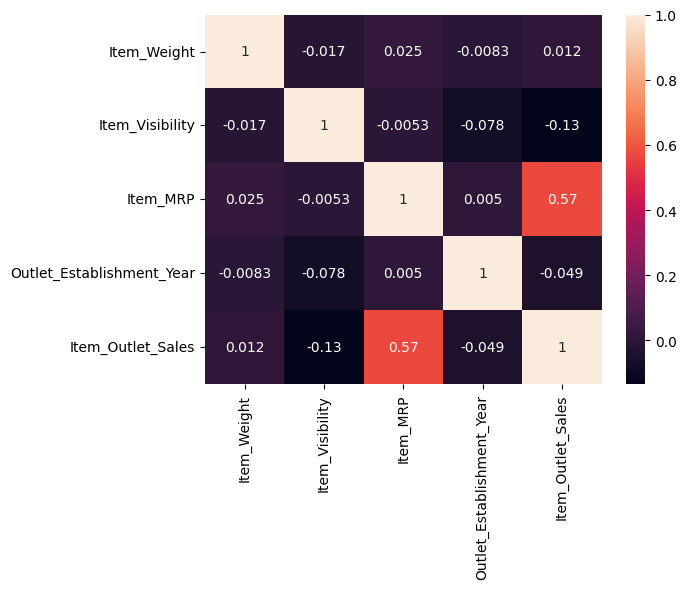

In [24]:
sns.heatmap(mart_df.corr(), annot=True)

## Feature Engineering 

In [25]:
mart_df['Item_Type_2'] = mart_df['Item_Identifier'].apply(lambda x: x[:2])
mart_df['Item_Type_2']

mart_df['Item_Type_2'] = mart_df['Item_Type_2'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
mart_df['Item_Type_2'].value_counts()

mart_df.loc[mart_df['Item_Type_2']=='Non-Consumable', 'Item_Fat_Content'] = 'Uneatable'
mart_df['Item_Fat_Content'].value_counts()

Low Fat      3918
Regular      3006
Uneatable    1599
Name: Item_Fat_Content, dtype: int64

In [26]:
mart_df['Item_Type_2'] = mart_df['Item_Identifier'].apply(lambda x: x[:2])
mart_df['Item_Type_2']

mart_df['Item_Type_2'] = mart_df['Item_Type_2'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
mart_df['Item_Type_2'].value_counts()

mart_df.loc[mart_df['Item_Type_2']=='Non-Consumable', 'Item_Fat_Content'] = 'Uneatable'
mart_df['Item_Fat_Content'].value_counts()

mart_df['Outlet_Years'] = 2013 - mart_df['Outlet_Establishment_Year']
mart_df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

## Categorical Encoding

### Label Encoding

In [27]:
encoder = LabelEncoder()
mart_df['Item_Type_2'] = encoder.fit_transform(mart_df["Item_Type_2"])
mart_df['Item_Fat_Content'] = encoder.fit_transform(mart_df["Item_Fat_Content"])
mart_df['Item_Type'] = encoder.fit_transform(mart_df["Item_Type"])
mart_df['Outlet_Identifier'] = encoder.fit_transform(mart_df["Outlet_Identifier"])
mart_df['Outlet_Size'] = encoder.fit_transform(mart_df["Outlet_Size"])
mart_df['Outlet_Location_Type'] = encoder.fit_transform(mart_df["Outlet_Location_Type"])
mart_df['Outlet_Type'] = encoder.fit_transform(mart_df["Outlet_Type"])

# mart_df = mart_df.apply(encoder.fit_transform)
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_2,Outlet_Years
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,14
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,4
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,14
3,FDX07,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800,1,15
4,NCD19,8.93,2,0.066132,9,53.8614,1,1987,0,2,1,994.7052,2,26


### One_hot Encoding

In [28]:
mart_df = pd.get_dummies(mart_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_2'])

In [29]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_2_0,Item_Type_2_1,Item_Type_2_2
0,FDA15,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,1,1987,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


## Data Preprocessing 

In [30]:
x=mart_df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier',  'Item_Outlet_Sales'])
y=mart_df["Item_Outlet_Sales"]

In [31]:
x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_2_0',
       'Item_Type_2_1', 'Item_Type_2_2'],
      dtype='object')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

## Training the Models

### Linear Regression 

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_test)
print(r2_score(y_test, predictions)) 
print("Accuracy using mean squared error:",  mean_squared_error(y_test, predictions))

0.5606195821195016
Accuracy using mean squared error: 1302463.4315039844


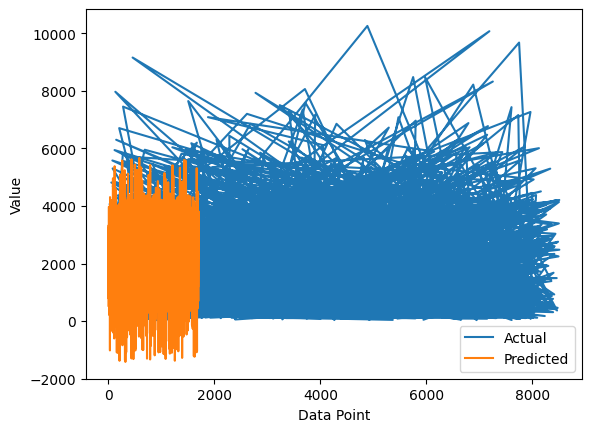

In [34]:
fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(y_test, label='Actual')
ax.plot(predictions, label='Predicted')

# Add a legend and label the axes
ax.legend()
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')

# Show the plot
plt.show()

### Regularized Linear Regression

In [35]:
reg2 = Ridge(alpha=1.0)
reg2.fit(x_train, y_train)

predications = reg2.predict(x_test)
print(r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predications))

0.5606195821195016
Mean Squared Error: 1303243.7732500043


In [36]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

predications = lasso.predict(x_test)
print(r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predications))

0.5606195821195016
Mean Squared Error: 1303085.3049403098


In [37]:
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(x_train, y_train)
predications = reg_e.predict(x_test)
print(r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predications))

0.5606195821195016
Mean Squared Error: 1358617.649800182


### Random Forest

In [38]:
rf_model = RandomForestRegressor(n_estimators = 400)

rf_model.fit(x_train, y_train)
predicted = rf_model.predict(x_test)
print(r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predications))

0.5606195821195016
Mean Squared Error: 1358617.649800182


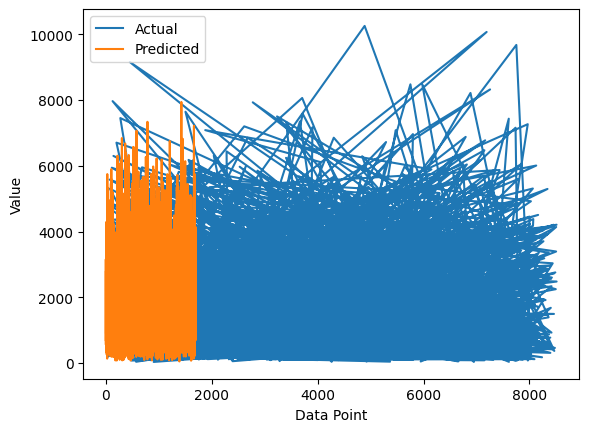

In [39]:
fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(y_test, label='Actual')
ax.plot(predicted, label='Predicted')

# Add a legend and label the axes
ax.legend()
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')

# Show the plot
plt.show()

### XGBoost Regressor 

In [40]:
xg_reg = XGBRegressor(learning_rate = 0.1, alpha = 10, n_estimators = 400)

xg_reg.fit(x_train,y_train)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(xg_reg, x_train, y_train, cv=kfold)
y_test_pred = xg_reg.predict(x_test)
print(y_test_pred)
print(r2_score(y_test, predictions))

mse = mean_squared_error(y_test_pred, y_test)

print(mse)

[ 379.43015 1246.0793  3233.8542  ... 2516.1177  1598.5345  2544.4917 ]
0.5606195821195016
1429788.3541504508


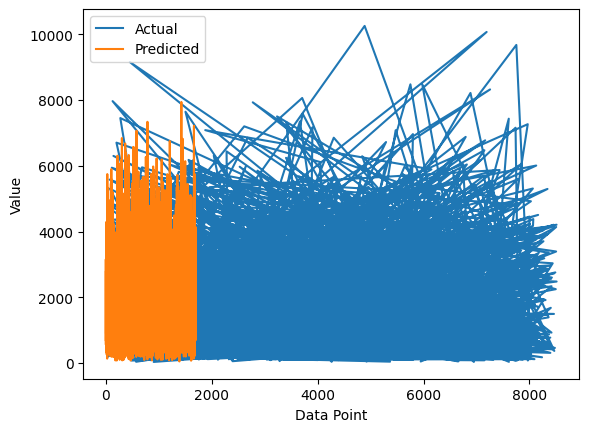

In [41]:
fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(y_test, label='Actual')
ax.plot(predicted, label='Predicted')

# Add a legend and label the axes
ax.legend()
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')

# Show the plot
plt.show()

## Selecting the Model

We will take the model having less MSE than all others. So by looking at these models we have linear regression model having high accuracy than all others

### Predicting values of slaes by using test dataset

In [42]:
test_df = pd.read_csv('Test.csv')

In [43]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Converting the dataset so that it can predict the values from model b/c we have to use same format of data while predicting the values.

In [44]:
# For numerical column
replacing_values = test_df["Item_Weight"].mean()
test_df["Item_Weight"].replace(np.nan, replacing_values, inplace=True)

# For categorical column
imputer = SimpleImputer(strategy='most_frequent')

test_df['Outlet_Size'] = imputer.fit_transform(test_df[['Outlet_Size']])

In [45]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [46]:
test_df['Item_Type_2'] = test_df['Item_Identifier'].apply(lambda x: x[:2])
test_df['Item_Type_2']

test_df['Item_Type_2'] = test_df['Item_Type_2'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test_df['Item_Type_2'].value_counts()

test_df.loc[test_df['Item_Type_2']=='Non-Consumable', 'Item_Fat_Content'] = 'Uneatable'
test_df['Item_Fat_Content'].value_counts()

Low Fat      2581
Regular      2013
Uneatable    1087
Name: Item_Fat_Content, dtype: int64

In [47]:
test_df['Outlet_Years'] = 2013 - test_df['Outlet_Establishment_Year']
test_df['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

In [48]:
encoder = LabelEncoder()
test_df['Item_Type_2'] = encoder.fit_transform(test_df["Item_Type_2"])
test_df['Item_Fat_Content'] = encoder.fit_transform(test_df["Item_Fat_Content"])
test_df['Item_Type'] = encoder.fit_transform(test_df["Item_Type"])
test_df['Outlet_Identifier'] = encoder.fit_transform(test_df["Outlet_Identifier"])
test_df['Outlet_Size'] = encoder.fit_transform(test_df["Outlet_Size"])
test_df['Outlet_Location_Type'] = encoder.fit_transform(test_df["Outlet_Location_Type"])
test_df['Outlet_Type'] = encoder.fit_transform(test_df["Outlet_Type"])

# mart_df = mart_df.apply(encoder.fit_transform)
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_2,Outlet_Years
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1,14
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1,1,6
2,NCN55,14.600000,2,0.099575,11,241.7538,0,1998,1,2,0,2,15
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1,1,6
4,FDY38,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,1,28


In [49]:
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_2'])

In [50]:
test_df = test_df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier'])

In [51]:
test_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_2_0,Item_Type_2_1,Item_Type_2_2
0,20.750000,0.007565,13,107.8622,9,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,2,6,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,0,15,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,2,6,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,5,28,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,8,16,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,3,4,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,7,11,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.000000,3,214.6218,2,6,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


Since we have same number of columns as training dataset has, now we can predict the sales using linear regression model 

In [56]:
predictions = lin_reg.predict(test_df)

### Adding predicted sales to the test file 

In [53]:
test_df_2 = pd.read_csv('Test.csv') 
test_df_2['Item_Outlet_Sales'] = predictions

In [54]:
test_df_2.to_csv(r'D:\Intrenship\Mini-Project-BigMart-Sales-Predictive-Analysis\updated_test.csv', index=False, header=True)